# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [4]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Examine the shapes of the training and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [6]:
#image dimensons
print( x_train.shape[1:])

(32, 32, 3)


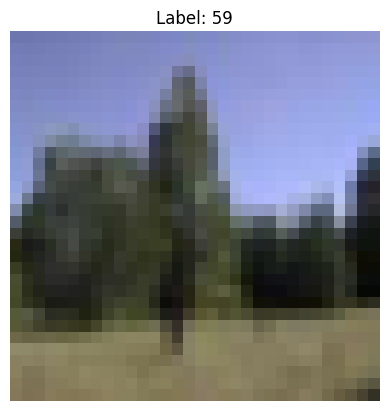

In [7]:
import matplotlib.pyplot as plt

def show_sample_image(index):
    plt.imshow(x_train[index])
    plt.title(f"Label: {y_train[index][0]}")
    plt.axis('off')
    plt.show()

show_sample_image(110)

In [8]:
import numpy as np
num_classes = len(np.unique(y_train))
print("number of classes:", num_classes)

number of classes: 100


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
import numpy as np
from keras.datasets import cifar100
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [10]:
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:
# Loss function - crossentropy:  designed for multi-class classification problems where each sample belongs to one of several classes

#Optimizer - adam:adaptive learning rate and efficiency in handling various types of neural network architectures

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [14]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1  # Print progress during training
)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 95s 93ms/step - accuracy: 0.0322 - loss: 4.4214 - val_accuracy: 0.1394 - val_loss: 3.6993
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 144s 94ms/step - accuracy: 0.1304 - loss: 3.6830 - val_accuracy: 0.1965 - val_loss: 3.3260
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 96ms/step - accuracy: 0.1915 - loss: 3.3353 - val_accuracy: 0.2505 - val_loss: 3.0566
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.2388 - loss: 3.0948 - val_accuracy: 0.2804 - val_loss: 2.9060
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 95ms/step - accuracy: 0.2697 - loss: 2.9180 - val_accuracy: 0.3021 - val_loss: 2.8036
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 96ms/step - accuracy: 0.2987 - loss: 2.7625 - val_accuracy: 0.3160 - val_loss: 2.7404
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 141s 95ms/step - accuracy: 0.3263 - loss: 2.6117 - val_accuracy: 0.3320 - val_loss: 2.6570
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 96ms/step - accuracy: 0

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Your code here
# accuracy: 0.3434

# other metric: cross-entropy loss

# reason for selection: directly measures how well the model’s predicted probabilities match the true labels.

# value of metric:2.6061

# interpretation of metric value: this indicates poor performance of the validation set, the model might be overfitted.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

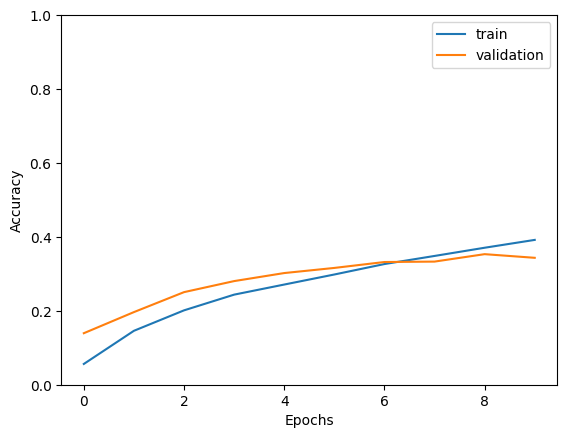

In [22]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [24]:
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

correct_indices = np.where(predicted_classes == true_classes)[0]
misclassified_indices = np.where(predicted_classes != true_classes)[0]


correct_index = correct_indices[10]
incorrect_index = misclassified_indices[10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


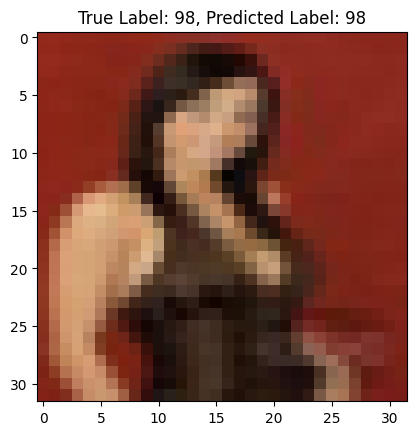

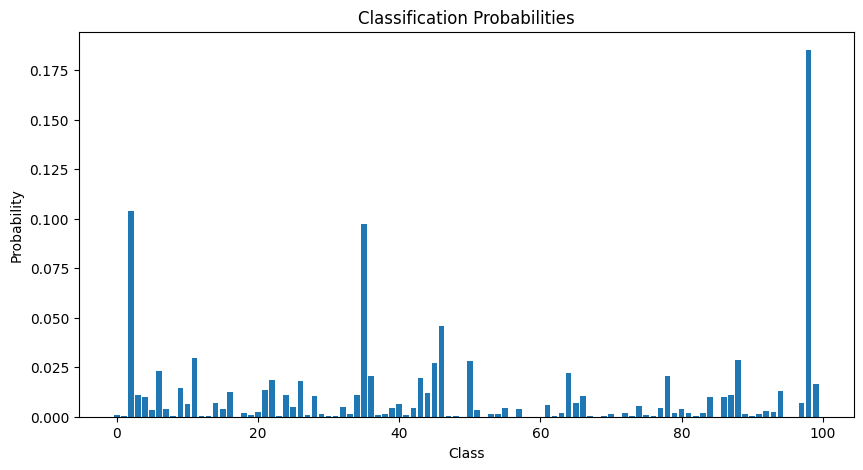

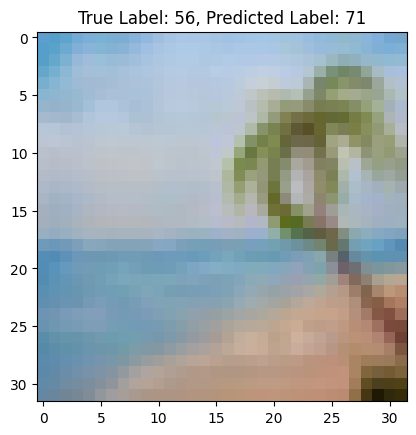

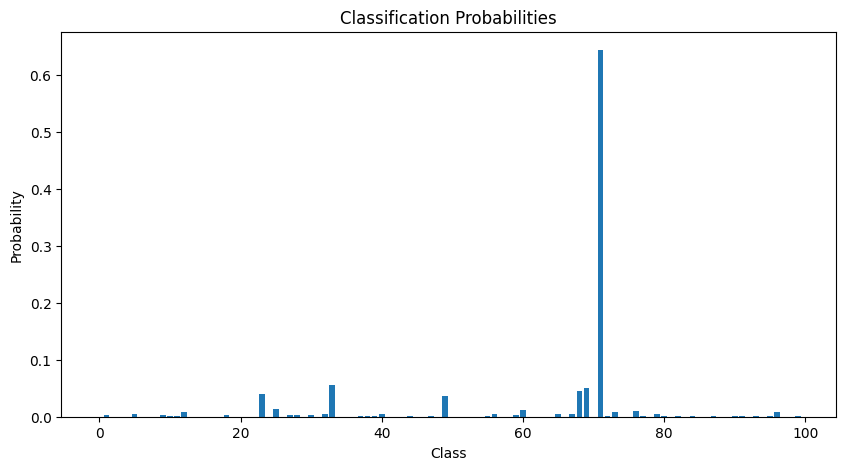

In [25]:
# Function to plot an image and display its classification probabilities
def plot_image_and_probabilities(index, predictions, true_labels, predicted_labels, x_data):
    plt.imshow(x_data[index])
    plt.title(f"True Label: {true_labels[index]}, Predicted Label: {predicted_labels[index]}")

    # Display classification probabilities
    probs = predictions[index]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(probs)), probs)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Classification Probabilities')
    plt.show()

# Plot correct classification
plot_image_and_probabilities(correct_index, predictions, true_classes, predicted_classes, x_test)

# Plot incorrect classification
plot_image_and_probabilities(incorrect_index, predictions, true_classes, predicted_classes, x_test)


In [ ]:


# The accuracy plot shows that the data might be overfitted as the val_accuracy decreased with the last epoch.

# With the  given training accuracy (39.56%) and validating accuracy (34.34%), the model performance is less than ideal.
#However, CIFAR-100 is a complex dataset with 100 classes.

# With the correctly classified image - high probability for the predicted class confirms the model is correct.
# With inccorectly classified image has high probability for an inccorect class but low probability for the correct class.
# The model is uncertain about the true class.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# I decided to try using a base model ResNet, which has learned from large datasets to extract features from images.

In [32]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # You can adjust the number of neurons
predictions = Dense(100, activation='softmax')(x)  # CIFAR-100 has 100 classes

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 274s 203ms/step - accuracy: 0.0119 - loss: 4.6595 - val_accuracy: 0.0183 - val_loss: 4.5603
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 218ms/step - accuracy: 0.0192 - loss: 4.5481 - val_accuracy: 0.0225 - val_loss: 4.5302
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 334s 227ms/step - accuracy: 0.0224 - loss: 4.5250 - val_accuracy: 0.0210 - val_loss: 4.5157
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 309s 217ms/step - accuracy: 0.0201 - loss: 4.5134 - val_accuracy: 0.0222 - val_loss: 4.5071
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 320s 216ms/step - accuracy: 0.0234 - loss: 4.5044 - val_accuracy: 0.0250 - val_loss: 4.4967
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 216ms/step - accuracy: 0.0272 - loss: 4.4844 - val_accuracy: 0.0304 - val_loss: 4.4529
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 284s 186ms/step - accuracy: 0.0320 - loss: 4.4445 - val_accuracy: 0.0293 - val_loss: 4.4354
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 273s 219ms/step - ac

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

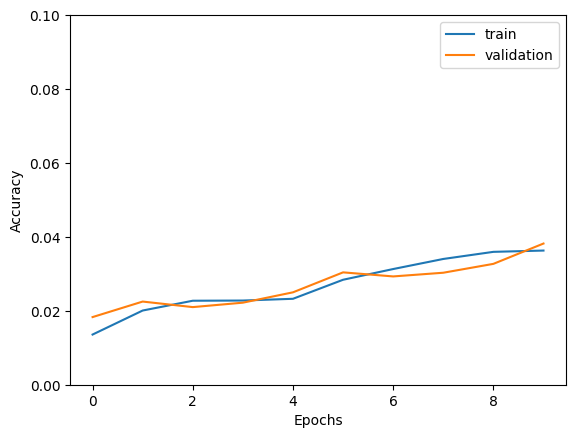

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 0.1)
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [37]:
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

correct_indices = np.where(predicted_classes == true_classes)[0]
misclassified_indices = np.where(predicted_classes != true_classes)[0]


correct_index = correct_indices[10]
incorrect_index = misclassified_indices[10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step


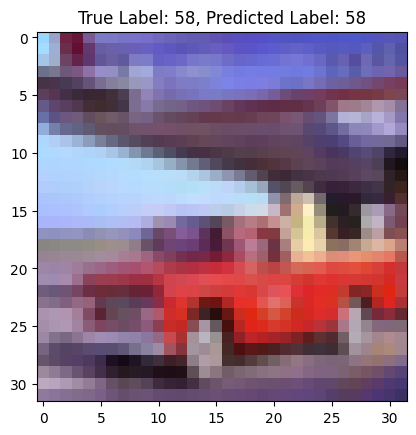

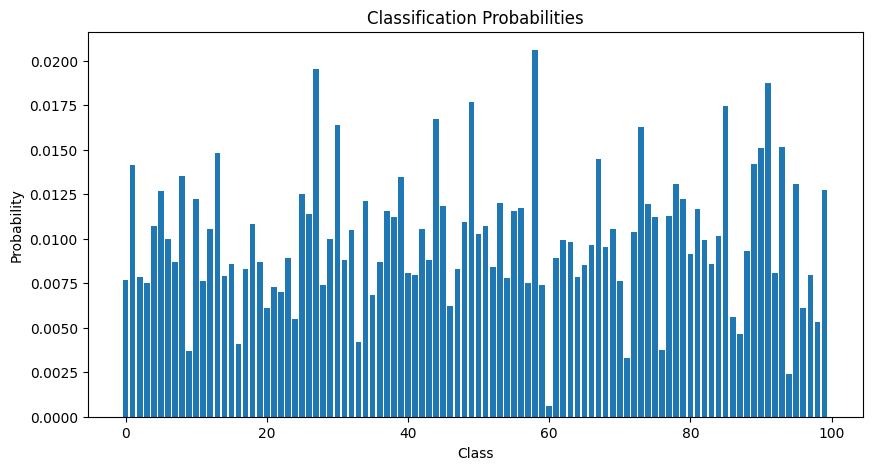

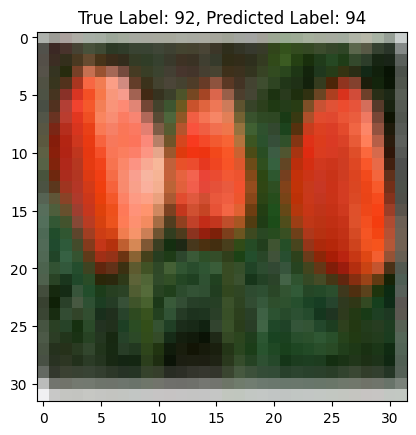

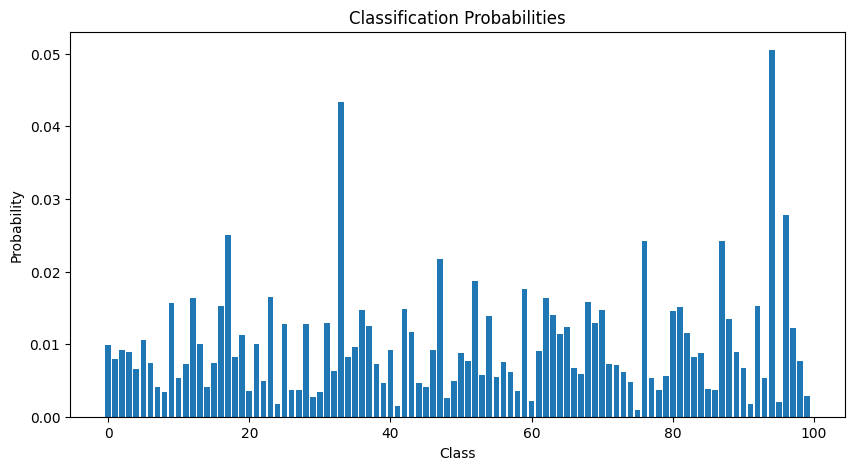

In [35]:
# Function to plot an image and display its classification probabilities
def plot_image_and_probabilities(index, predictions, true_labels, predicted_labels, x_data):
    plt.imshow(x_data[index])
    plt.title(f"True Label: {true_labels[index]}, Predicted Label: {predicted_labels[index]}")

    # Display classification probabilities
    probs = predictions[index]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(probs)), probs)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Classification Probabilities')
    plt.show()

# Plot correct classification
plot_image_and_probabilities(correct_index, predictions, true_classes, predicted_classes, x_test)

# Plot incorrect classification
plot_image_and_probabilities(incorrect_index, predictions, true_classes, predicted_classes, x_test)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

In [ ]:
# The new results show an accuracy of 0.0119 and a validation accuracy of 0.0183, with a loss of 4.6596 and a validation loss of 4.5603.
# Unfortunately the model's performance was poorer this time. This could be due to several factors,
#such as the as the complexity of CIFA-100 dataset and small number of epochs (model training is time-consuming).
#There is definitely room for improvement such as fine-tuning deeper layers of ResNet, experimenting with different learning rates, trying ata augmentation techniques.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.